# **Import Library**

In [ ]:
import pandas as pd
import nltk
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Load the dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSV FILE FOR ML/dataset_sentiments.csv')


# **Data Visualization**

In [ ]:
df.shape

(568454, 3)

In [ ]:
df.head()

,Unnamed: 0,text,Score
0,0,This seems a little more wholesome than some o...,neutral
1,1,"The flavors are good. However, I do not see a...",neutral
2,2,This is the same stuff you can buy at the big ...,neutral
3,3,we're used to spicy foods down here in south t...,neutral
4,4,Watch your prices with this. While the assort...,neutral


# **Data Analyse**

In [ ]:
df['Score'].value_counts()

positive    443777
negative     82037
neutral      42640
Name: Score, dtype: int64

In [ ]:
df_positive = df[df['Score']=='positive'][:2000]
df_negative = df[df['Score']=='negative'][:2000]
df_neutral = df[df['Score']=='neutral'][:2000]
y=df['Score']


In [ ]:
df_positive_negative=df_positive['Score'].append(df_negative['Score'])

In [ ]:
df_positive_negative.append(df_neutral['Score'])

42640    positive
42642    positive
42644    positive
42645    positive
42646    positive
           ...   
1995      neutral
1996      neutral
1997      neutral
1998      neutral
1999      neutral
Name: Score, Length: 6000, dtype: object

# **Data Cleaning**



```
cleaning
stemming
lemmatization
```



In [ ]:
def data_cleaning(x):
    html='''<br /><br />'''

    # Removing punctuations in string
    # Using loop + punctuation string
    list1=[]
    for sentence in x:
      
      
      sentence = sentence.replace(html, "")
      list1.append(sentence)

    # initializing punctuations string
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    
    # Removing punctuations in string
    # Using loop + punctuation string
    list2=[]
    for sentence in list1:
      for char in sentence:
          if char in punc:
              sentence = sentence.replace(char, "")
      list2.append(sentence)

    stop_words = set(stopwords.words('english'))
    list3=[]
    for sentence in list2:
      list4=[]
      for word in sentence.split():
        if word.lower() in stop_words:
          pass
        else:
          list4.append(word)
      list3.append(' '.join(list4))
        
    porter = PorterStemmer()
    list5=[]
    for sentence in list3:
      list4=[]
      for word in sentence.split():
        stemmed_word = porter.stem(word)
        list4.append(stemmed_word)
      list5.append(' '.join(list4))

    wordnet_lemmatizer = WordNetLemmatizer()

    list6=[]
    for sentence in list5:
      list4=[]
      for word in sentence.split():
        stemmed_word = wordnet_lemmatizer.lemmatize(word)
        list4.append(stemmed_word)
      list6.append(' '.join(list4))
    return (list6)

In [ ]:
positive_review_after_cleaning = data_cleaning(df_positive['text'])
negative_review_after_cleaning = data_cleaning(df_negative['text'])
neutral_review_after_cleaning = data_cleaning(df_neutral['text'])

In [ ]:
len(positive_review_after_cleaning),len(negative_review_after_cleaning),len(neutral_review_after_cleaning)

(2000, 2000, 2000)

In [ ]:
df_new=pd.DataFrame()
df_new['text']=positive_review_after_cleaning+negative_review_after_cleaning+neutral_review_after_cleaning
df_new['score']=df_positive_negative.append(df_neutral['Score']).values

In [ ]:
df_new.shape

(6000, 2)

In [ ]:
df_new

,text,score
0,bought sever vital can dog food product found ...,positive
1,confect around centuri light pillowi citru gel...,positive
2,great taffi great price wide assort yummi taff...,positive
3,got wild hair taffi order five pound bag taffi...,positive
4,saltwat taffi great flavor soft chewi candi in...,positive
...,...,...
5995,like coffe dont want acid great coffe wife lov...,neutral
5996,puroast didnt deep coffe smell first open pack...,neutral
5997,dont know anyth w caffein give bad indigest pa...,neutral
5998,scale one ten maxwel hous one gevalia ten coff...,neutral


# **Data Visualize**

## **Positive review**

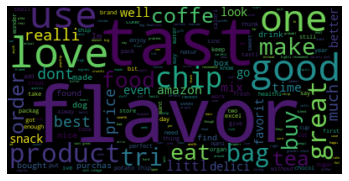

In [ ]:
# Start with one review:
text = ' '.join(positive_review_after_cleaning)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Negative Review**

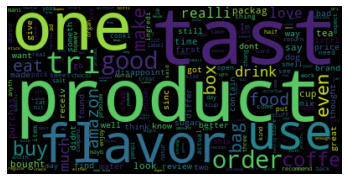

In [ ]:
# Start with one review:
text = ' '.join(negative_review_after_cleaning)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Neutral Review**

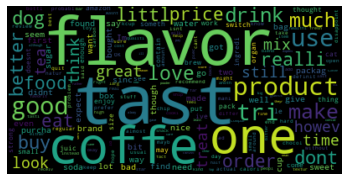

In [ ]:
# Start with one review:
text = ' '.join(neutral_review_after_cleaning)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Split the dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
...     df_new['text'], df_new['score'], test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4800,), (1200,), (4800,), (1200,))

# **Data Processing**



```
# bow - unigram, bigram,trigram
# tfidf - unigram, bigram,trigram
```



## **BOW**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)
X_train_bow.shape,X_test_bow.shape

((4800, 14482), (1200, 14482))

## **TFIDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_train_tfidf.shape,X_test_tfidf.shape

((4800, 14482), (1200, 14482))

# **Modeling**

## **knn**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for i in range(3,30,2):
      print('k = '+str(i))
      # train the model using the train data
      neigh = KNeighborsClassifier(n_neighbors=i)
      neigh.fit(X_train_tfidf, y_train)

      # predict using the trained model
      y_pred_train = neigh.predict(X_train_tfidf)
      y_pred_test = neigh.predict(X_test_tfidf)

      # Accuracy
      acc_train = accuracy_score(y_train, y_pred_train)
      print('Accuracy of training data',acc_train)
      acc_test = accuracy_score(y_test, y_pred_test)
      print('Accuracy of testing data',acc_test)
      print('-'*50)
      print('-'*50)

k = 3
Accuracy of training data 0.78125
Accuracy of testing data 0.6091666666666666
--------------------------------------------------
--------------------------------------------------
k = 5
Accuracy of training data 0.7302083333333333
Accuracy of testing data 0.5991666666666666
--------------------------------------------------
--------------------------------------------------
k = 7
Accuracy of training data 0.7097916666666667
Accuracy of testing data 0.6208333333333333
--------------------------------------------------
--------------------------------------------------
k = 9
Accuracy of training data 0.69
Accuracy of testing data 0.6291666666666667
--------------------------------------------------
--------------------------------------------------
k = 11
Accuracy of training data 0.6808333333333333
Accuracy of testing data 0.6341666666666667
--------------------------------------------------
--------------------------------------------------
k = 13
Accuracy of training data 0.6804

## **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

list1 = [0.0001,0.001,0.01,0.1,1,10,50,100,1000,10000]
for i in list1:
      print(' alpha = '+str(i))
      # train the model using the train data
      bayes = GaussianNB(var_smoothing = i )
      bayes.fit(X_train_tfidf.toarray(), y_train)

      # predict using the trained model
      y_pred_train = bayes.predict(X_train_tfidf.toarray())
      y_pred_test = bayes.predict(X_test_tfidf.toarray())

      # Accuracy
      acc_train = accuracy_score(y_train, y_pred_train)
      print('Accuracy of training data',acc_train)
      acc_test = accuracy_score(y_test, y_pred_test)
      print('Accuracy of testing data',acc_test)
      print('-'*50)
      print('-'*50)

 alpha = 0.0001
Accuracy of training data 0.9310416666666667
Accuracy of testing data 0.5358333333333334
--------------------------------------------------
--------------------------------------------------
 alpha = 0.001
Accuracy of training data 0.9585416666666666
Accuracy of testing data 0.5683333333333334
--------------------------------------------------
--------------------------------------------------
 alpha = 0.01
Accuracy of training data 0.93875
Accuracy of testing data 0.6125
--------------------------------------------------
--------------------------------------------------
 alpha = 0.1
Accuracy of training data 0.8495833333333334
Accuracy of testing data 0.675
--------------------------------------------------
--------------------------------------------------
 alpha = 1
Accuracy of training data 0.7522916666666667
Accuracy of testing data 0.6783333333333333
--------------------------------------------------
--------------------------------------------------
 alpha = 10


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

list1 = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in list1:
      print(' alpha = '+str(i))
      # train the model using the train data
      bayes = LogisticRegression(penalty='l2',C=i,n_jobs = -1 )
      bayes.fit(X_train_tfidf.toarray(), y_train)

      # predict using the trained model
      y_pred_train = bayes.predict(X_train_tfidf.toarray())
      y_pred_test = bayes.predict(X_test_tfidf.toarray())

      # Accuracy
      acc_train = accuracy_score(y_train, y_pred_train)
      print('Accuracy of training data',acc_train)
      acc_test = accuracy_score(y_test, y_pred_test)
      print('Accuracy of testing data',acc_test)
      print('-'*50)
      print('-'*50)

 alpha = 0.0001
Accuracy of training data 0.338125
Accuracy of testing data 0.325
--------------------------------------------------
--------------------------------------------------
 alpha = 0.001
Accuracy of training data 0.586875
Accuracy of testing data 0.5558333333333333
--------------------------------------------------
--------------------------------------------------
 alpha = 0.01
Accuracy of training data 0.7010416666666667
Accuracy of testing data 0.6675
--------------------------------------------------
--------------------------------------------------
 alpha = 0.1
Accuracy of training data 0.7704166666666666
Accuracy of testing data 0.7058333333333333
--------------------------------------------------
--------------------------------------------------
 alpha = 1
Accuracy of training data 0.89375
Accuracy of testing data 0.72
--------------------------------------------------
--------------------------------------------------
 alpha = 10
Accuracy of training data 0.992291

# **Inference**

In [ ]:
sentence = 'taste is avarge'
clean_sentence = data_cleaning([sentence])
clean_sentence_tfidf = vectorizer.transform(clean_sentence)
neigh = KNeighborsClassifier(n_neighbors=17)
neigh.fit(X_train_tfidf, y_train)
y_pred_clean_sentence_tfidf = neigh.predict(clean_sentence_tfidf)
y_pred_clean_sentence_tfidf[0]

'neutral'

In [ ]:
clean_sentence_tfidf.shape 

(1, 14482)